## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

# EDA - ANALIZA EKSPLORACYJNA DANYCH

In [2]:
# importujemy biblioteki pythona
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# zapewnienie wyświetlania wszystkich kolumn
pd.set_option('display.max_columns', None)

In [5]:
# załadowanie pliku z danymi do analizy
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


**spostrzeżenie**: Dane zawierają 1310 wierszów i 14 kolumn - z tego 7 kolumn numerycznych zmiennoprzecinkowych. Wiersz nr 1309 nie zawiera żadnych danych, więc na etapie analizy brakujących wartości zostanie usunięty.

## 1. Ogólny przegląd danych
### 1.1. Analiza wstępna

In [6]:
# wyświetlamy 10 losowych wierszów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
385,2.0,1.0,"Davies, Master. John Morgan Jr",male,8.0,1.0,1.0,C.A. 33112,36.7500,NaN,S,14,NaN,"St Ives, Cornwall / Hancock, MI"
163,1.0,1.0,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1.0,0.0,113789,52.0000,NaN,S,8,NaN,"New York, NY"
310,1.0,0.0,"Wick, Mr. George Dennick",male,57.0,1.0,1.0,36928,164.8667,NaN,S,NaN,NaN,"Youngstown, OH"
946,3.0,0.0,"Lam, Mr. Len",male,NaN,0.0,0.0,1601,56.4958,NaN,S,NaN,NaN,NaN
990,3.0,0.0,"Makinen, Mr. Kalle Edvard",male,29.0,0.0,0.0,STON/O 2. 3101268,7.9250,NaN,S,NaN,NaN,NaN
290,1.0,0.0,"Taussig, Mr. Emil",male,52.0,1.0,1.0,110413,79.6500,E67,S,NaN,NaN,"New York, NY"
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
1013,3.0,0.0,"Meanwell, Miss. (Marion Ogden)",female,NaN,0.0,0.0,SOTON/O.Q. 392087,8.0500,NaN,S,NaN,NaN,NaN
758,3.0,1.0,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1.0,0.0,345572,17.4000,NaN,S,15,NaN,"Tampico, MT"
408,2.0,0.0,"Fillbrook, Mr. Joseph Charles",male,18.0,0.0,0.0,C.A. 15185,10.5000,NaN,S,NaN,NaN,"Cornwall / Houghton, MI"


In [7]:
# ponowne wyświetlenie 10 losowych wierszów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
756,3.0,0.0,"Davison, Mr. Thomas Henry",male,NaN,1.0,0.0,386525,16.1000,NaN,S,NaN,NaN,"Liverpool, England Bedford, OH"
584,2.0,1.0,"Webber, Miss. Susan",female,32.5000,0.0,0.0,27267,13.0000,E101,S,12,NaN,"England / Hartford, CT"
680,3.0,0.0,"Boulos, Mr. Hanna",male,NaN,0.0,0.0,2664,7.2250,NaN,C,NaN,NaN,Syria
866,3.0,1.0,"Hirvonen, Miss. Hildur E",female,2.0000,0.0,1.0,3101298,12.2875,NaN,S,15,NaN,NaN
773,3.0,0.0,"Dimic, Mr. Jovan",male,42.0000,0.0,0.0,315088,8.6625,NaN,S,NaN,NaN,NaN
359,2.0,1.0,"Caldwell, Master. Alden Gates",male,0.8333,0.0,2.0,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
1131,3.0,1.0,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0000,0.0,0.0,SOTON/O.Q. 392078,8.0500,E10,S,9,NaN,NaN
193,1.0,1.0,"Madill, Miss. Georgette Alexandra",female,15.0000,0.0,1.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
607,3.0,1.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0000,0.0,0.0,2657,7.2292,NaN,C,C,NaN,"Greensburg, PA"


**spostrzeżenie**: W kolumnie 'age' nie wszystkie wartości są liczbami całkowitymi.

In [8]:
# sprawdzenie typów danych w poszczególnych kolumnach
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [9]:
# sprawdzenie wartości unikatowych w każdej kolumnie
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

**spostrzeżenie**: W kolumnie 'age' występuje 98 unikatowych wartości, ale powyżej zauważyliśmy, że nie wszystkie wartości w tej kolumnie są liczbami całkowitymi, więc nie można przyjąć, że najstarsza osoba miała 98 lat.

In [10]:
# sprawdzenie łącznej liczby zgonów
df['survived'].value_counts()

survived
0.0    809
1.0    500
Name: count, dtype: int64

In [11]:
# sprawdzenie liczebności kobiet i mężczyzn
df['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [12]:
# obliczenie podstawowych statystyk dla każdej kolumny
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [13]:
# sprawdzamy najliczniejsze rodziny
df_max_family = df[(df['parch'] >= 8)]
df_max_family

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1179,3.0,0.0,"Sage, Mr. John George",male,NaN,1.0,9.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1180,3.0,0.0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1.0,9.0,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


### 1.2. Spostrzeżenia i wnioski wstępne
- W rejsie brały udział zarówno pojedyncze osoby, jak i rodziny nawet 11-osobowe.
- Każdy pasażer należał do 1 z 3 klas biletowych i wsiadł na 1 z 3 portów.
- Kobiety stanowiły ok. 36% liczby pasażerów, a mężczyźni ok. 64%.
- Najstarsza osoba miała 80 lat.
- Ponad 61% wszystkich pasażerów nie przeżyło.

## 2. Brakujące wartości
### 2.1. Analiza

In [14]:
# sprawdzamy wartości brakujące w poszczególnych kolumnach
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [15]:
# usunięcie pustego wiersza o indeksie 1309
df.drop(1309, inplace=True)

In [16]:
# ponownie sprawdzamy braki w kolumnach
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

**spostrzeżenie**: Po usunięciu pustego wiersza o indeksie 1309, pojedyncze braki w kolumnach już nie występują.

In [17]:
# sprawdzenie liczby pasażerów o nieprzypisanym numerze kabiny z podziałem na klasy
df[df["cabin"].isnull()].groupby('pclass').size().reset_index(name="count")

,pclass,count
0,1.0,67
1,2.0,254
2,3.0,693


### 2.2. Wnioski
Znaczne braki danych występują w 5 kolumnach. Niedobór informacji odnoszących się do numeru kabiny można wytłumaczyć faktem, że pasażerowie z 2. i 3. klasy biletowej po prostu ich nie wykupowali. Braki dotyczące numeru ciała i łodzi ratunkowej są zrozumiałe - części martwych ciał nie odnalezione, a część osób po prostu przeżyła, więc nie byli numerowani. Ci, którzy przeżyli, byli w olbrzymim stresie i nie skupiali się na szczegółach takich jak numer łodzi, co może tłumaczyć powód braków w kolumnie 'boat'. 
Dziwić może natomiat fakt braku danych odnośnie celu podróży pasażerów, który powinien być określony przed wejściem na pokład statku oraz braki dotyczące wieku pasażerów (braki u ok. 20% wszystkich pasażerów).

## 3. Badanie pojedynczych kolumn

In [18]:
# zmiana nazw i kolejności kolumn dla lepszej czytelności
df_all = df.rename(columns = {'pclass': 'Klasa', 'survived': 'Czy przeżył', 'name': 'Imię i nazwisko', 'sex': 'Płeć', 'age': 'Wiek', 'sibsp': 'Rodzeństwo/małżonkowie', 'parch': 'Rodzice/dzieci', 'ticket': 'Nr biletu', 'fare': 'Cena', 'cabin': 'Nr kabiny', 'embarked': 'Port wyjścia', 'boat': 'Nr łodzi', 'body': 'Nr ciała', 'home.dest': 'Port docelowy'})
df_all = df_all[['Klasa', 'Port wyjścia', 'Cena', 'Nr biletu', 'Nr kabiny', 'Imię i nazwisko', 'Wiek', 'Płeć', 'Rodzeństwo/małżonkowie', 'Rodzice/dzieci', 'Port docelowy', 'Nr łodzi', 'Nr ciała', 'Czy przeżył' ]]
df_all

,Klasa,Port wyjścia,Cena,Nr biletu,Nr kabiny,Imię i nazwisko,Wiek,Płeć,Rodzeństwo/małżonkowie,Rodzice/dzieci,Port docelowy,Nr łodzi,Nr ciała,Czy przeżył
0,1.0,S,211.3375,24160,B5,"Allen, Miss. Elisabeth Walton",29.0000,female,0.0,0.0,"St Louis, MO",2,NaN,1.0
1,1.0,S,151.5500,113781,C22 C26,"Allison, Master. Hudson Trevor",0.9167,male,1.0,2.0,"Montreal, PQ / Chesterville, ON",11,NaN,1.0
2,1.0,S,151.5500,113781,C22 C26,"Allison, Miss. Helen Loraine",2.0000,female,1.0,2.0,"Montreal, PQ / Chesterville, ON",NaN,NaN,0.0
3,1.0,S,151.5500,113781,C22 C26,"Allison, Mr. Hudson Joshua Creighton",30.0000,male,1.0,2.0,"Montreal, PQ / Chesterville, ON",NaN,135.0,0.0
4,1.0,S,151.5500,113781,C22 C26,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,female,1.0,2.0,"Montreal, PQ / Chesterville, ON",NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,C,14.4542,2665,NaN,"Zabour, Miss. Hileni",14.5000,female,1.0,0.0,NaN,NaN,328.0,0.0
1305,3.0,C,14.4542,2665,NaN,"Zabour, Miss. Thamine",NaN,female,1.0,0.0,NaN,NaN,NaN,0.0
1306,3.0,C,7.2250,2656,NaN,"Zakarian, Mr. Mapriededer",26.5000,male,0.0,0.0,NaN,NaN,304.0,0.0
1307,3.0,C,7.2250,2670,NaN,"Zakarian, Mr. Ortin",27.0000,male,0.0,0.0,NaN,NaN,NaN,0.0


### 3.1. Klasy

(array([0, 1, 2]), [Text(0, 0, '1.0'), Text(1, 0, '2.0'), Text(2, 0, '3.0')])

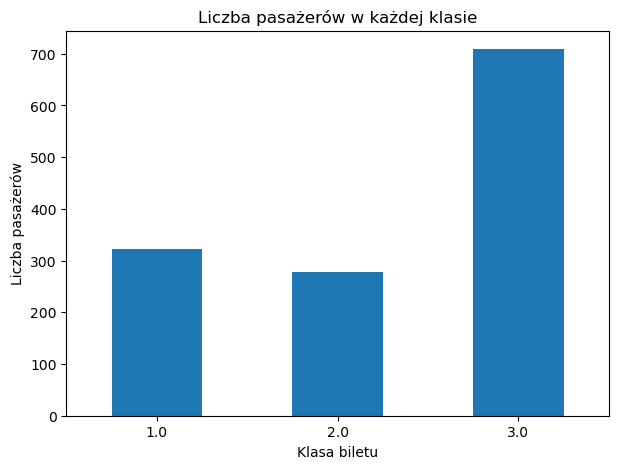

In [19]:
# wykres słupkowy prezentujący częstość występowania każdej klasy
# sprawdzamy częstość występowania każdej klasy
ticket_class_counts = df_all['Klasa'].value_counts().sort_index()


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
ticket_class_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba pasażerów w każdej klasie')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

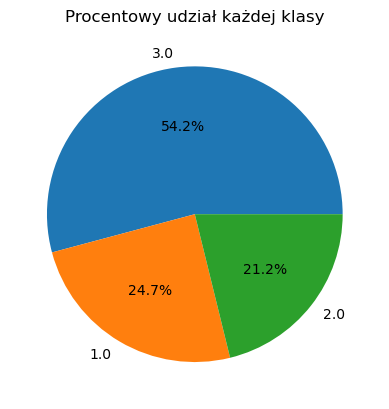

In [20]:
# wykres kołowy prezentujący procentowy udział poszczególnych klas
df_all['Klasa'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział każdej klasy')
plt.ylabel('')

#### Wnioski:
- Najwięcej pasażerów podróżowało w 3. klasie, a najmniej w 2.
- Pasażerowie 3. klasy stanowili ponad połowę podróżujących.

### 3.2. Porty wyjścia

In [21]:
# sprawdzenie częstości występowania danego portu
df_all['Port wyjścia'].value_counts()

Port wyjścia
S    914
C    270
Q    123
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')])

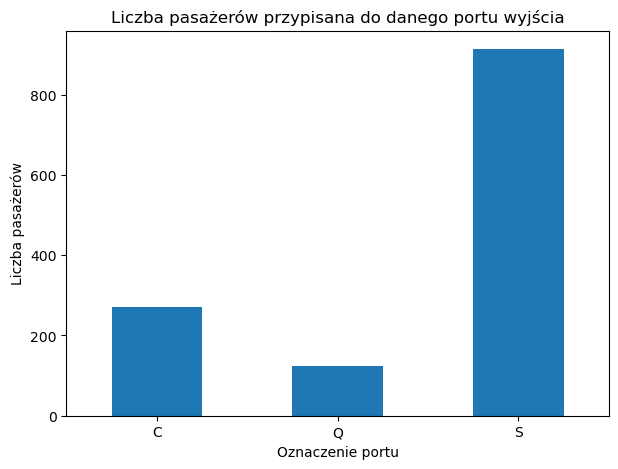

In [22]:
# wykres słupkowy prezentujący częstość występowania każdego portu wyjścia
# sprawdzamy częstość występowania każdego portu
embarked_type_counts = df_all['Port wyjścia'].value_counts().sort_index()


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
embarked_type_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba pasażerów przypisana do danego portu wyjścia')
plt.xlabel('Oznaczenie portu')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

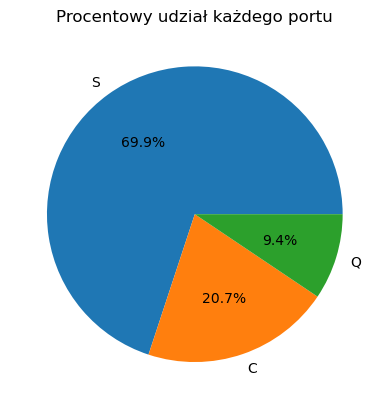

In [23]:
# wykres kołowy prezentujący udział procentowy portów
df_all['Port wyjścia'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział każdego portu')
plt.ylabel('')

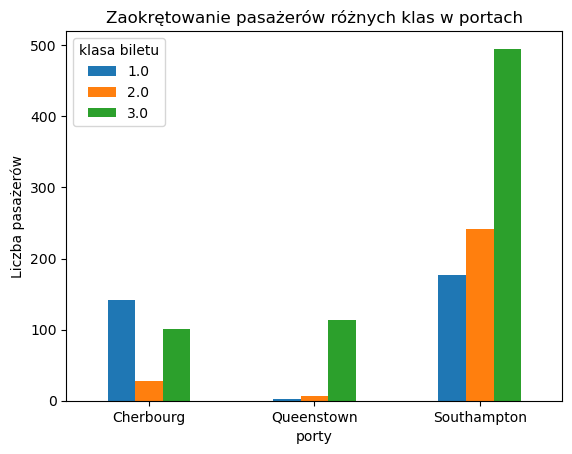

In [24]:
# Wykres słupkowy pokazujący ilu pasażerów weszło na pokład na danym porcie z podziałem na klasy

# tworzymy zmienną przechowującą liczbę osób w danym porcie z rozróżnieniem klas 
embarked_class_counts = df_all.groupby(['Port wyjścia', 'Klasa']).size().reset_index()

# ustalamy nazwy i kolejność kolumn
embarked_class_counts.columns = ['porty', 'klasa biletu', 'liczba']

embarked_class_together = embarked_class_counts.pivot(index='porty', columns='klasa biletu', values='liczba')
ax = embarked_class_together.plot(kind='bar')

# ustalamy tytuł wykresu i osi
plt.title('Zaokrętowanie pasażerów różnych klas w portach')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)
ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'])
plt.show()

#### Wnioski:
- Niemal 70% wszystkich pasażerów weszło na pokład z portu w Southampton, a tylko niecałe 10% w Queenstown.
- W porcie w Cherbourg najczęściej wchodzili na pokład pasażerowie z klasy 1., a w pozostałych dwóch portach pasażerowie z klasy 3. 

### 3.3. Ceny

In [25]:
# obliczamy podstawowe statystyki dla cen z rozróżnieniem klas
df_all.groupby('Klasa', as_index=False)['Cena'].agg(['mean', 'median', 'std', 'min', 'max'])

,Klasa,mean,median,std,min,max
0,1.0,87.508992,60.0000,80.447178,0.0,512.3292
1,2.0,21.179196,15.0458,13.607122,0.0,73.5000
2,3.0,13.302889,8.0500,11.494358,0.0,69.5500


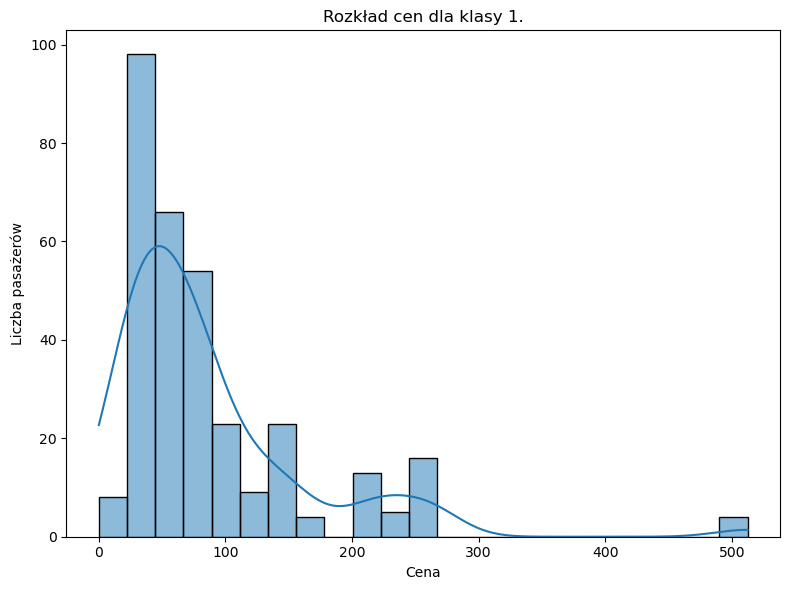

In [26]:
# tworzymy histogramy dla ceny dla poszczególnych klas biletów
# tworzymy zmienną przechowującą dane cenowe pasażerów z klasy 1. i usuwamy wiersze z brakującymi wartościami
first_class_fares = df_all[df_all['Klasa'] == 1.0]['Cena'].dropna()

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(8, 6))

# tworzymy histogram
sns.histplot(first_class_fares, kde=True)
plt.title('Rozkład cen dla klasy 1.')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

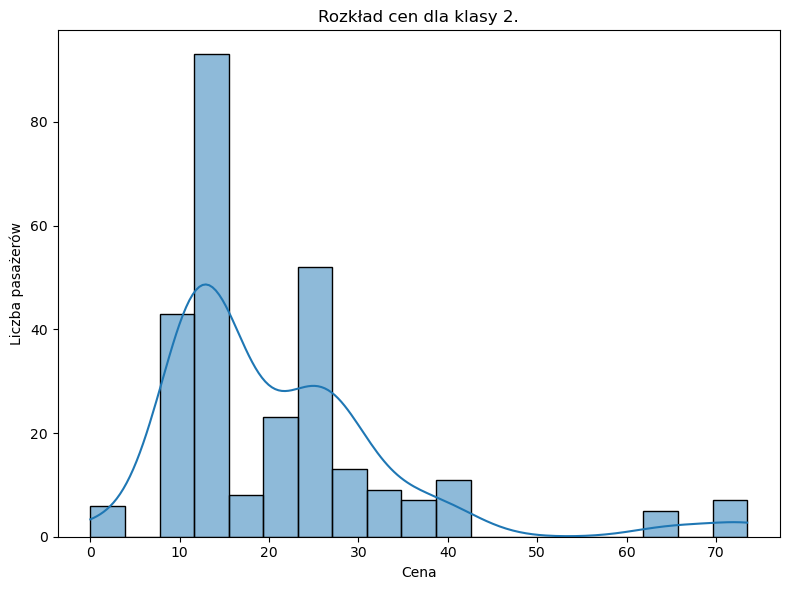

In [27]:
# tworzymy zmienną przechowującą dane cenowe pasażerów z klasy 2. i usuwamy wiersze z brakującymi wartościami
second_class_fares = df_all[df_all['Klasa'] == 2.0]['Cena'].dropna()

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(8, 6))

# tworzymy histogram
sns.histplot(second_class_fares, kde=True)
plt.title('Rozkład cen dla klasy 2.')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

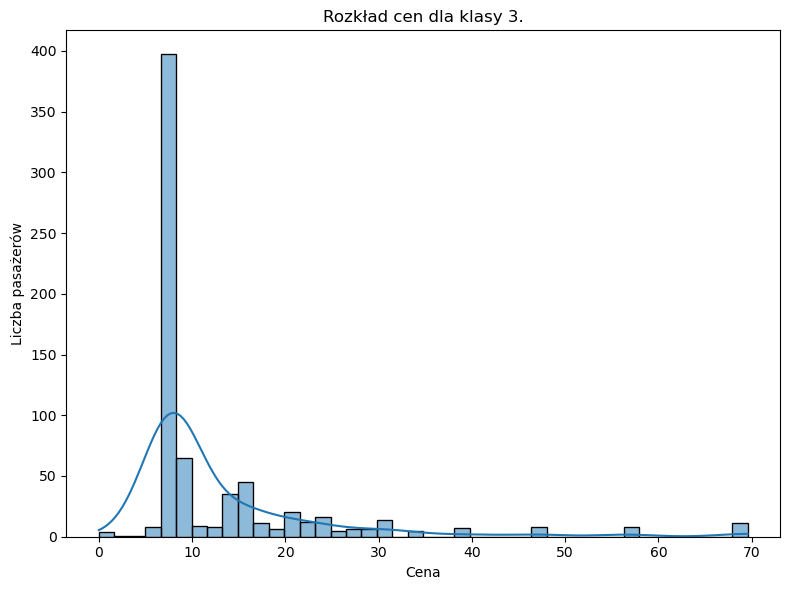

In [28]:
# tworzymy zmienną przechowującą dane cenowe pasażerów z klasy 3. i usuwamy wiersze z brakującymi wartościami
third_class_fares = df_all[df_all['Klasa'] == 3.0]['Cena'].dropna()

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(8, 6))

# tworzymy histogram
sns.histplot(third_class_fares, kde=True)
plt.title('Rozkład cen dla klasy 3.')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

#### Wnioski:
- Najwięcej pasażerów w 1. klasie nabyło bilet za kwotę 26,55, w 2. klasie za 13, a w 3. za 8,05.
- Maksymalna cen biletu w 1. klasie to 512, w 2. klasie 73,5, a w 3. 69,55.

### 3.4. Przeżywalność i ciała ofiar

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

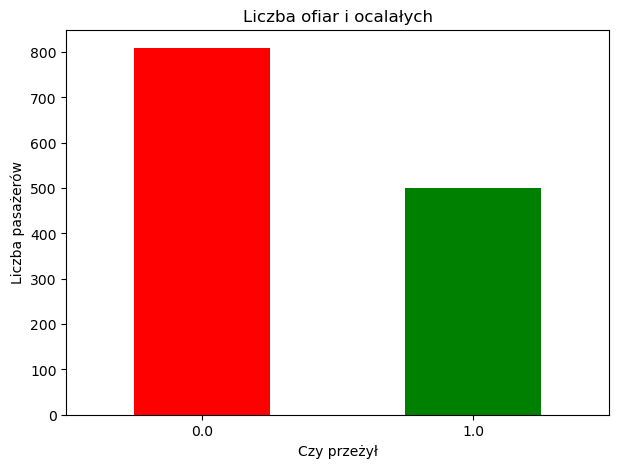

In [31]:
# wykres słupkowy prezentujący liczbę ofiar i ocalałych bez podziału na klasy
# sprawdzamy liczbę ofiar i ocalałych
survived_counts = df_all['Czy przeżył'].value_counts().sort_index()


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
survived_counts.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba ofiar i ocalałych')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

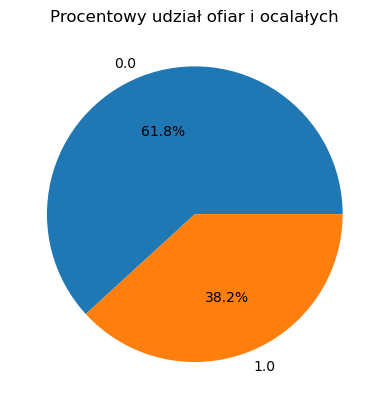

In [32]:
# wykres kołowy prezentujący udział procentowy ofiar i ocalałych bez podziału na klasy
df_all['Czy przeżył'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział ofiar i ocalałych')
plt.ylabel('')

In [33]:
# dane prezentujące liczbę znalezionych ciał i ich numery
# tworzymy zmienną przechowującą listę pasażerów, którzy nie przeżyli
dead_counts = df_all[df_all['Czy przeżył'] == 0]

# tworzymy zmienną sprawdzającą ile ciał znaleziono i ponumerowano
found_body = dead_counts['Nr ciała']
found_body.nunique()

121

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

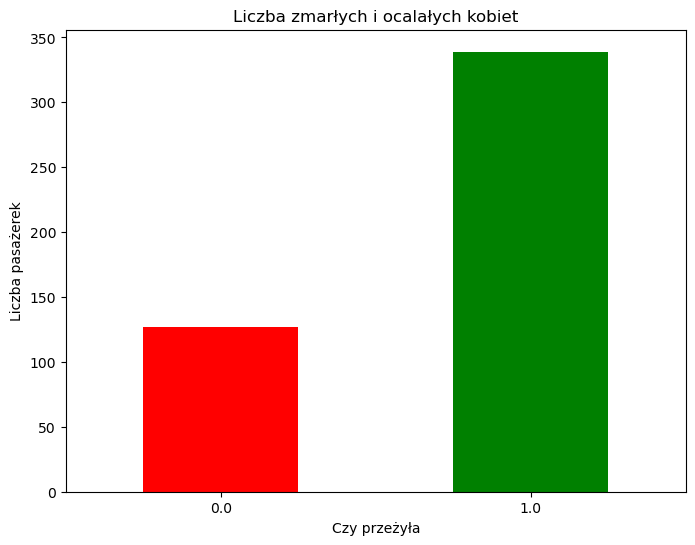

In [34]:
# tworzymy zmienne przechowujące dane o przeżywalności kobiet
women_counts = df_all[df_all['Płeć'] == 'female']
survived_women_counts = women_counts['Czy przeżył'].value_counts().sort_index()
# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(8, 6))
survived_women_counts.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba zmarłych i ocalałych kobiet')
plt.xlabel('Czy przeżyła')
plt.ylabel('Liczba pasażerek')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

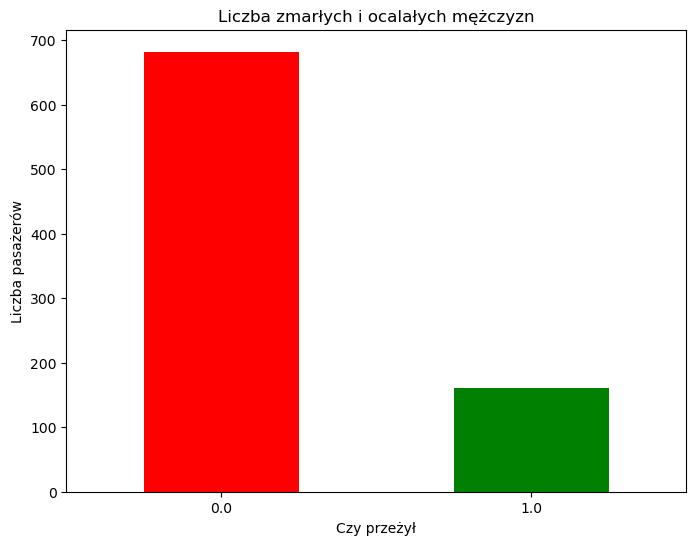

In [35]:
# tworzymy zmienne przechowujące dane o przeżywalności mężczyzn
men_counts = df_all[df_all['Płeć'] == 'male']
survived_men_counts = men_counts['Czy przeżył'].value_counts().sort_index()

# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(8, 6))
survived_men_counts.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba zmarłych i ocalałych mężczyzn')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

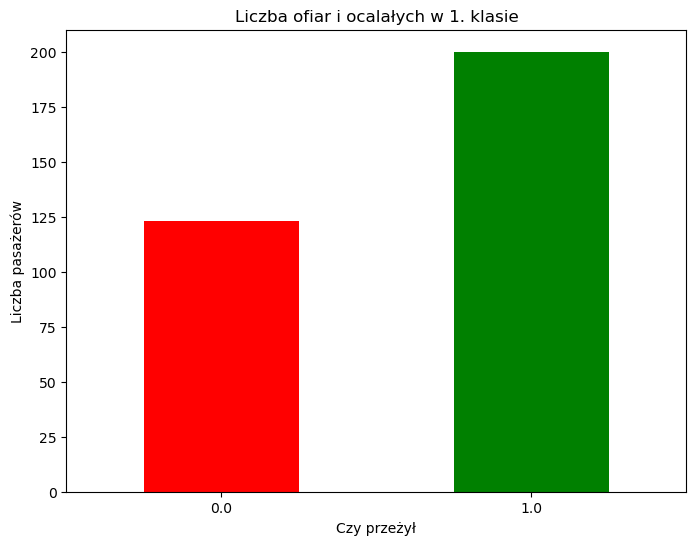

In [36]:
# tworzymy zmienne przechowujące dane o przeżywalności pasażerów z klasy 1.
survived_first_class = df_all[df_all['Klasa'] == 1.0]
survived_counts_first_class = survived_first_class['Czy przeżył'].value_counts().sort_index()
# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(8, 6))
survived_counts_first_class.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba ofiar i ocalałych w 1. klasie')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

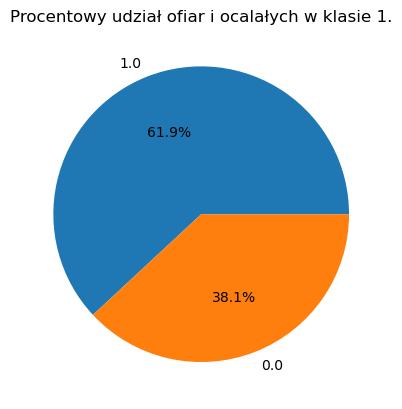

In [37]:
# wykres kołowy prezentujący udział procentowy ofiar i ocalałych w klasie 1.
survived_first_class['Czy przeżył'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział ofiar i ocalałych w klasie 1.')
plt.ylabel('')

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

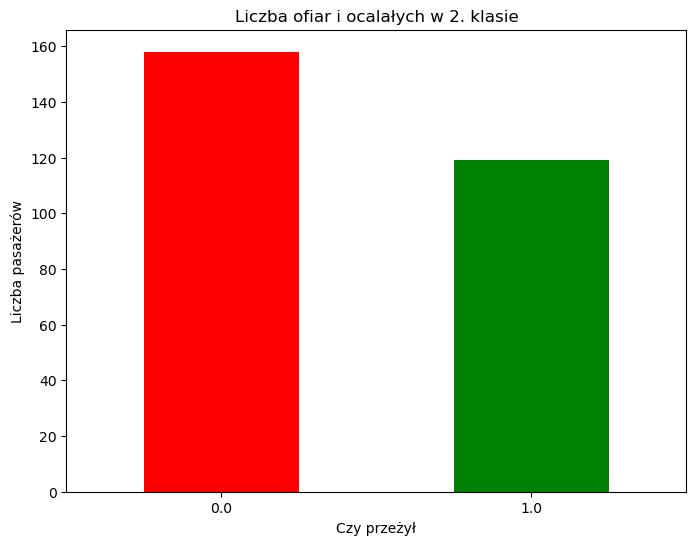

In [38]:
# tworzymy zmienne przechowujące dane o przeżywalności pasażerów z klasy 2.
survived_second_class = df_all[df_all['Klasa'] == 2.0]
survived_counts_second_class = survived_second_class['Czy przeżył'].value_counts().sort_index()

# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(8, 6))
survived_counts_second_class.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba ofiar i ocalałych w 2. klasie')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

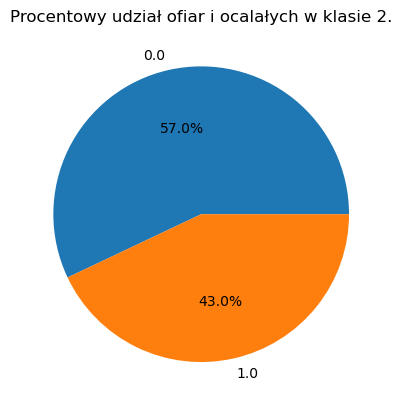

In [39]:
# wykres kołowy prezentujący udział procentowy ofiar i ocalałych w klasie 2.
survived_second_class['Czy przeżył'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział ofiar i ocalałych w klasie 2.')
plt.ylabel('')

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

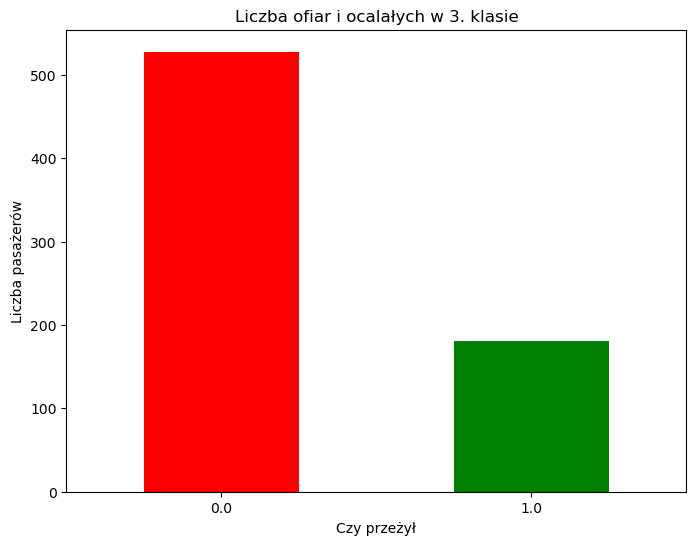

In [40]:
# tworzymy zmienne przechowujące dane o przeżywalności pasażerów z klasy 3.
survived_third_class = df_all[df_all['Klasa'] == 3.0]
survived_counts_third_class = survived_third_class['Czy przeżył'].value_counts().sort_index()

# tworzymy przestrzeń dla wykresu
plt.figure(figsize=(8, 6))
survived_counts_third_class.plot(kind='bar', color=['red', 'green'])

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba ofiar i ocalałych w 3. klasie')
plt.xlabel('Czy przeżył')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

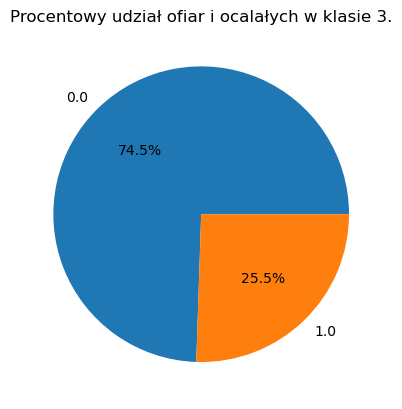

In [41]:
# wykres kołowy prezentujący udział procentowy ofiar i ocalałych w klasie 2.
survived_third_class['Czy przeżył'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział ofiar i ocalałych w klasie 3.')
plt.ylabel('')

#### Wnioski:
- W katastrofie zmarło 809 pasażerów (ok. 62%), a znaleziono i ponumerowano tylko 121 ciał.
- W drugiej i trzecie klasie liczba zmarłych była większa niż liczba ocalałych, ale w klasie pierwszej więcej osób przeżyło - stanowili oni niecałe 62%.
- Większość kobiet przeżyła.

### 3.5. Płeć

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

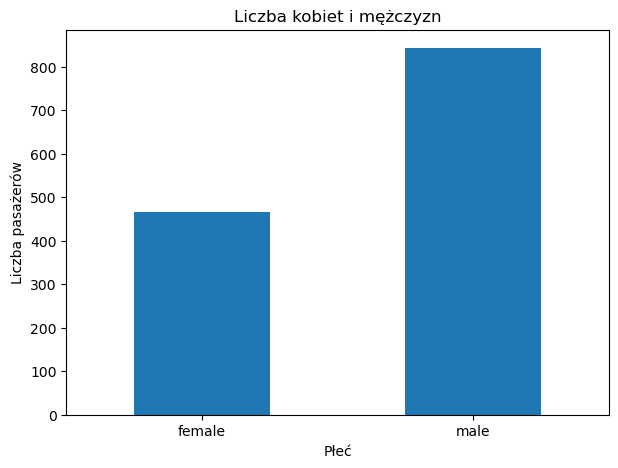

In [42]:
# wykres słupkowy prezentujący liczbę kobiet i mężczyzn
# sprawdzamy liczbę ofiar i ocalałych
sex_counts = df_all['Płeć'].value_counts().sort_index()


# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
sex_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba kobiet i mężczyzn')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

Text(0, 0.5, '')

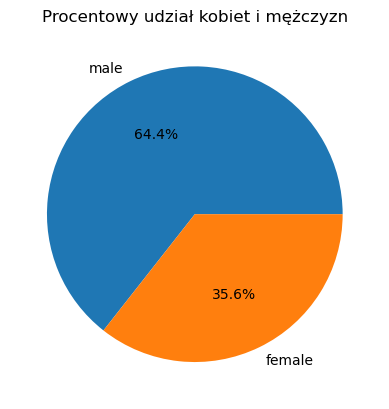

In [43]:
# wykres kołowy prezentujący udział procentowy kobiet i mężczyzn
df_all['Płeć'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Procentowy udział kobiet i mężczyzn')
plt.ylabel('')

#### Wnioski:
- Wśród pasażerów więcej było mężczyzn - stanowili oni ok. 64%.

### 3.6. Wiek

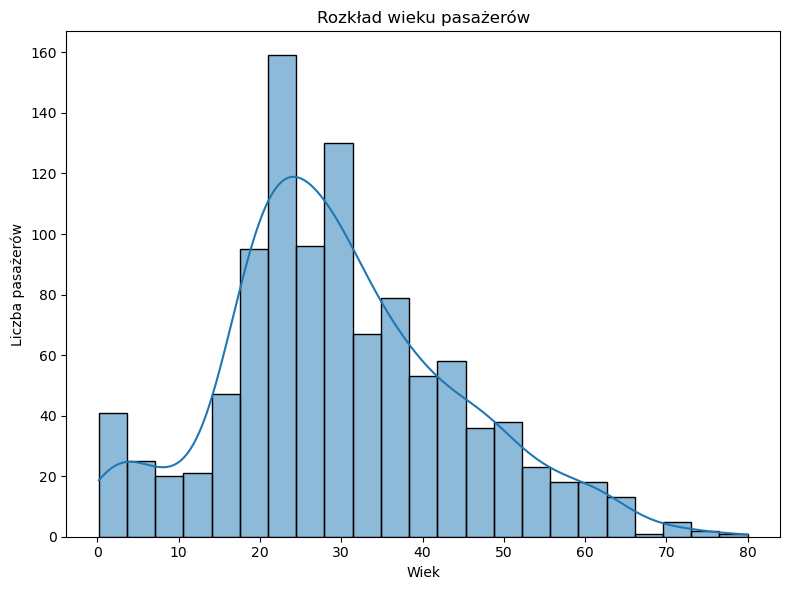

In [44]:
# tworzymy histogram dla wieku
# tworzymy zmienną przechowującą informcaje o wieku pasażerów
ages_counts = df_all['Wiek'].dropna()

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(8, 6))

# tworzymy histogram
sns.histplot(ages_counts, kde=True)
plt.title('Rozkład wieku pasażerów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

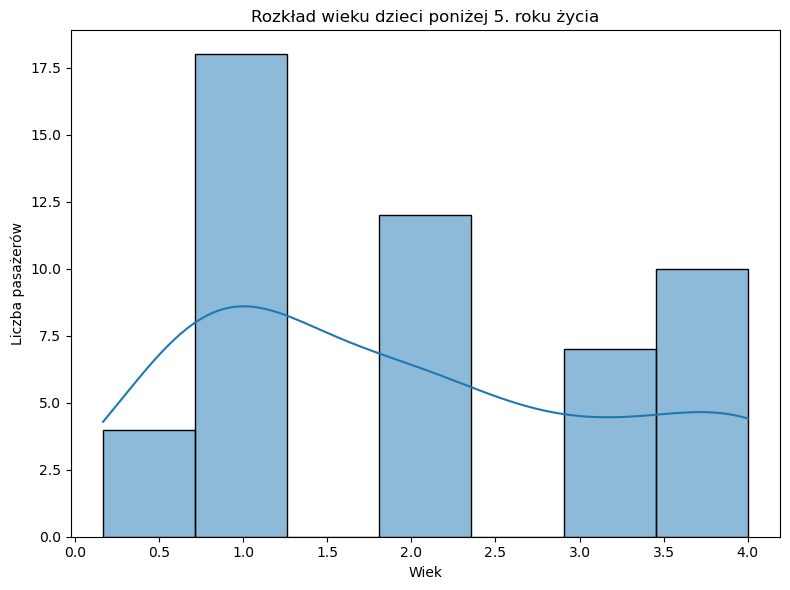

In [45]:
# tworzymy histogram dla wieku dzieci poniżej 10 roku życia i usuwamy wiersze z brakującymi wartościami
# tworzymy zmienną przechowującą informacje na temat dzieci poniżej 10 roku życia  i usuwamy wiersze z brakującymi wartościami
ages_children_counts = df_all[(df_all['Wiek'] < 5)] 

# tworzymy przestrzeń dla histogramu
plt.figure(figsize=(8, 6))

# tworzymy histogram
sns.histplot(ages_children_counts['Wiek'].dropna(), kde=True)
plt.title('Rozkład wieku dzieci poniżej 5. roku życia')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# ustawiamy automatyczne dostosowanie
plt.tight_layout()

In [46]:
ages_children_counts.describe()

,Klasa,Cena,Wiek,Rodzeństwo/małżonkowie,Rodzice/dzieci,Nr ciała,Czy przeżył
count,51.000000,51.000000,51.000000,51.000000,51.000000,1.0,51.000000
mean,2.588235,29.601225,2.022876,1.509804,1.372549,4.0,0.647059
std,0.605854,27.922785,1.253115,1.391008,0.488294,NaN,0.482640
min,1.000000,8.516700,0.166700,0.000000,1.000000,4.0,0.000000
25%,2.000000,15.820850,1.000000,1.000000,1.000000,4.0,0.000000
50%,3.000000,22.025000,2.000000,1.000000,1.000000,4.0,1.000000
75%,3.000000,31.275000,3.000000,2.000000,2.000000,4.0,1.000000
max,3.000000,151.550000,4.000000,5.000000,2.000000,4.0,1.000000


#### Wnioski:
Wiersze z brakującymi danymi (aż ok. 20%) zostały usunięte. Poniższe wnioski dotyczą pozostałych 80% pasażerów.
- Rozkład wieku pasażerów jest zbliżony do normalnego.
- Najczęstszy wiek pasażerów to 20-30 lat.
- Najstarszy pasażer miał 80 lat.
- Było 51 dzieci poniżej 5 roku życia, a najmłodsze miało ok. 2 miesięcy.

### 3.7. Małżeństwo i rodzeństwo oraz rodzice i dzieci

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '8.0')])

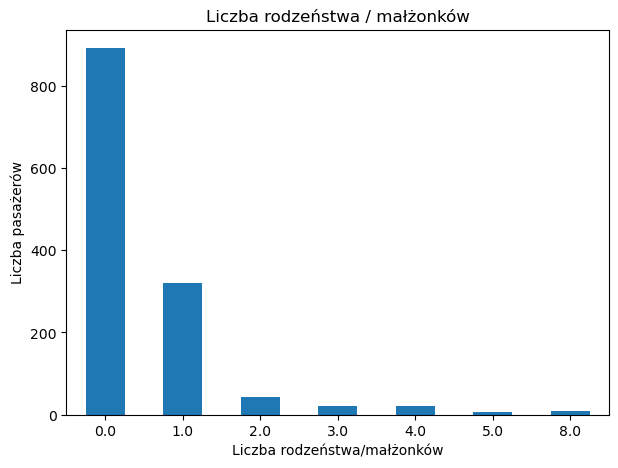

In [48]:
# wykres słupkowy prezentujący liczbę rodzeństwa lub małżeństwa pasażerów oraz liczbę pasażerów bez nich
# sprawdzamy częstość występowania indywidualnych pasażerów i kilkuosobowych rodzin
siblings_mariage_counts = df_all['Rodzeństwo/małżonkowie'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
siblings_mariage_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodzeństwa / małżonków')
plt.xlabel('Liczba rodzeństwa/małżonków')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '8.0')])

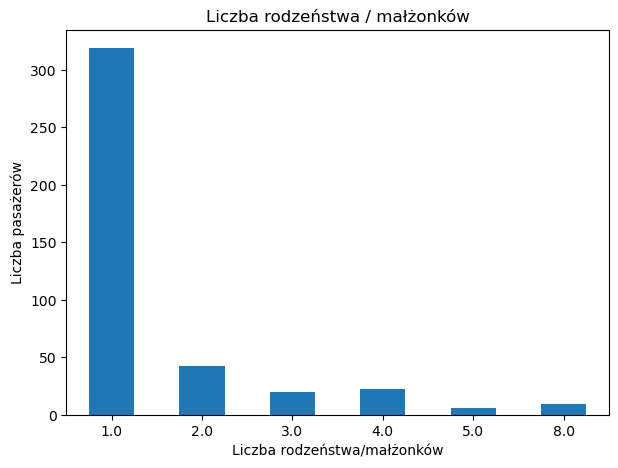

In [49]:
# wykres słupkowy prezentujący liczbę rodzeństwa lub małżeństwa pasażerów (z pominięciem samotnych pasażerów)
# sprawdzamy częstość występowania tylko kilkuosobowych rodzin
siblings_mariage_countsy = df_all[df_all['Rodzeństwo/małżonkowie'] > 0]
siblings_mariage_counts = siblings_mariage_countsy['Rodzeństwo/małżonkowie'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
siblings_mariage_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodzeństwa / małżonków')
plt.xlabel('Liczba rodzeństwa/małżonków')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

#### Wnioski dotyczące małżonków i rodzeństwa:
- Aż ok. 80% pasażerów podróżowało bez współmałżonka lub rodzeństwa, a ok 24% pasażerów z 1 z tych osób.
- Było 9 osób, które podróżowały z 8 rodzeństwa lub współmałżonkiem i 7 rodzeństwa.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '9.0')])

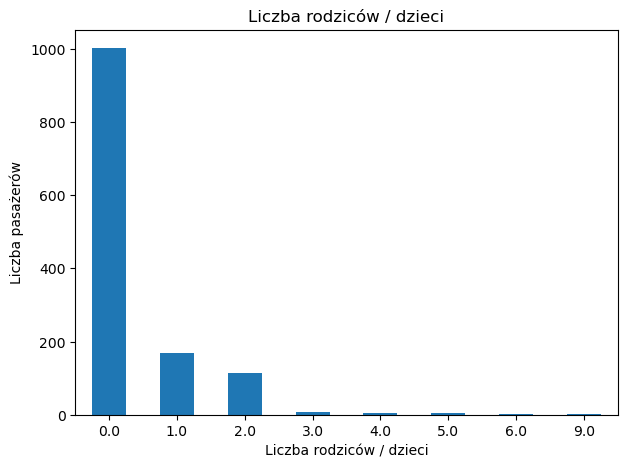

In [50]:
# wykres słupkowy prezentujący liczbę rodziców lub dzieci pasażerów oraz liczbę pasażerów bez nich
# sprawdzamy częstość występowania indywidualnych pasażerów i kilkuosobowych rodzin
parents_children_counts = df_all['Rodzice/dzieci'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
parents_children_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodziców / dzieci')
plt.xlabel('Liczba rodziców / dzieci')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '9.0')])

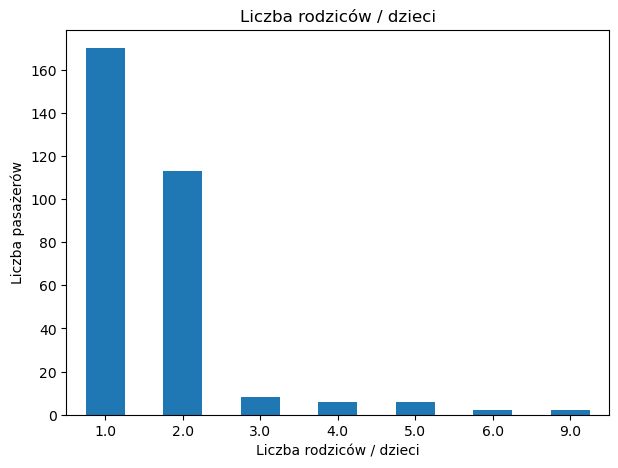

In [51]:
# wykres słupkowy prezentujący liczbę rodziców lub dzieci pasażerów (z pominięciem samotnych pasażerów)
# sprawdzamy częstość występowania tylko kilkuosobowych rodzin
parents_children_countsy = df_all[df_all['Rodzice/dzieci'] > 0]
parents_children_counts = parents_children_countsy['Rodzice/dzieci'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
parents_children_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczba rodziców / dzieci')
plt.xlabel('Liczba rodziców / dzieci')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

#### Wnioski dotyczące rodziców i dzieci:
- Ok. 76,5% pasażerów podróżowało bez dziecka i rodzica, a ok. 13% pasażerów z 1 z tych osób.
- Było 2 pasażerów, którzy podróżowali z 9 dzieci lub rodziców, więc możemy przypuszczać, że z 2 rodziców i 7 dzieci.

In [52]:
# sprawdzenie łącznej liczebności rodziny
# tworzymy nową kolumnę sumującą całą rodzinę wraz z rozpatrywanym pasażerem
df_all['Liczebność rodziny'] = df_all['Rodzeństwo/małżonkowie'] + df_all['Rodzice/dzieci'] + 1
df_all = df_all[['Klasa', 'Port wyjścia', 'Cena', 'Nr biletu', 'Nr kabiny', 'Imię i nazwisko', 'Wiek', 'Płeć', 'Rodzeństwo/małżonkowie', 'Rodzice/dzieci', 'Liczebność rodziny', 'Port docelowy', 'Nr łodzi', 'Nr ciała', 'Czy przeżył' ]]
df_all

,Klasa,Port wyjścia,Cena,Nr biletu,Nr kabiny,Imię i nazwisko,Wiek,Płeć,Rodzeństwo/małżonkowie,Rodzice/dzieci,Liczebność rodziny,Port docelowy,Nr łodzi,Nr ciała,Czy przeżył
0,1.0,S,211.3375,24160,B5,"Allen, Miss. Elisabeth Walton",29.0000,female,0.0,0.0,1.0,"St Louis, MO",2,NaN,1.0
1,1.0,S,151.5500,113781,C22 C26,"Allison, Master. Hudson Trevor",0.9167,male,1.0,2.0,4.0,"Montreal, PQ / Chesterville, ON",11,NaN,1.0
2,1.0,S,151.5500,113781,C22 C26,"Allison, Miss. Helen Loraine",2.0000,female,1.0,2.0,4.0,"Montreal, PQ / Chesterville, ON",NaN,NaN,0.0
3,1.0,S,151.5500,113781,C22 C26,"Allison, Mr. Hudson Joshua Creighton",30.0000,male,1.0,2.0,4.0,"Montreal, PQ / Chesterville, ON",NaN,135.0,0.0
4,1.0,S,151.5500,113781,C22 C26,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,female,1.0,2.0,4.0,"Montreal, PQ / Chesterville, ON",NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,C,14.4542,2665,NaN,"Zabour, Miss. Hileni",14.5000,female,1.0,0.0,2.0,NaN,NaN,328.0,0.0
1305,3.0,C,14.4542,2665,NaN,"Zabour, Miss. Thamine",NaN,female,1.0,0.0,2.0,NaN,NaN,NaN,0.0
1306,3.0,C,7.2250,2656,NaN,"Zakarian, Mr. Mapriededer",26.5000,male,0.0,0.0,1.0,NaN,NaN,304.0,0.0
1307,3.0,C,7.2250,2670,NaN,"Zakarian, Mr. Ortin",27.0000,male,0.0,0.0,1.0,NaN,NaN,NaN,0.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '11.0')])

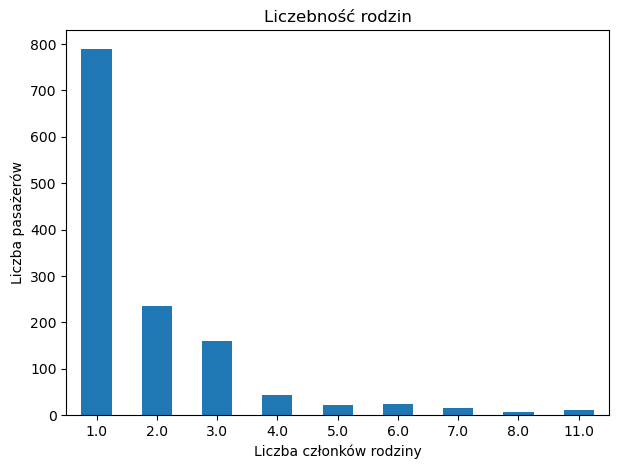

In [53]:
# wykres słupkowy prezentujący liczebność rodzin
# tworzymy zmienną przechowującą informacje o częstości występowania rodzin o konkretnej liczebności
all_families_counts = df_all['Liczebność rodziny'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
all_families_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczebność rodzin')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '11.0')])

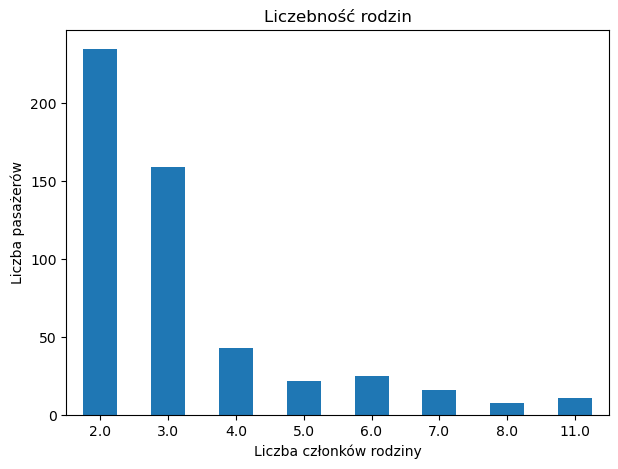

In [54]:
# wykres słupkowy prezentujący liczebność rodzin pasażerów (z pominięciem pasażerów samotnych)
# tworzymy zmienną przechowującą informacje o częstości występowania rodzin o konkretnej liczebności
non_alone_countsy = df_all[df_all['Liczebność rodziny'] > 1]
non_alone_counts = non_alone_countsy['Liczebność rodziny'].value_counts().sort_index()

# przygotowujemy przestrzeń dla wykresu
plt.figure(figsize=(7,5))
non_alone_counts.plot(kind='bar')

# nadajemy tytuł i podpisujemy osie
plt.title('Liczebność rodzin')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')
plt.xticks(rotation=0)

#### Wnioski dotyczące liczebności rodzin:
- Ok. 60% pasażerów podróżowało bez żadnego członka rodziny, a ok. 18% pasażerów z 1 członkiem rodziny.
- Najliczniejsza rodzina liczyła 11 osób.
- Podróżowały również rodziny 3-, 4-, 5-, 6-, 7- i 8-osobowe.

## 4. Transformacja danych
### 4.1. Duplikaty

In [55]:
# sprawdzamy istnienie duplikatów
df_all[df_all.duplicated()].sum()

Klasa                     0.0
Port wyjścia                0
Cena                      0.0
Nr biletu                   0
Nr kabiny                   0
Imię i nazwisko             0
Wiek                      0.0
Płeć                        0
Rodzeństwo/małżonkowie    0.0
Rodzice/dzieci            0.0
Liczebność rodziny        0.0
Port docelowy               0
Nr łodzi                    0
Nr ciała                  0.0
Czy przeżył               0.0
dtype: object

#### Wnioski:
- Nie wykryto zduplikowanych wartości.

## 5. Analiza relacji między kolumnami
### 5.1. Analiza

In [56]:
# stworzenie macierzy korelacji między kolumnami
plt.figure(figsize=(7,5))
sns.heatmap(df_all.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji')

ValueError: could not convert string to float: 'S'

<Figure size 700x500 with 0 Axes>

### 5.2. Wnioski
- Największą korelację otrzymujemy między liczebnością rodziny oraz liczbą rodzeństwa/małżonków i liczbą rodziców/dzieci, co oczywiście było pewne, ponieważ liczebność rodziny jest sumą dwóch ww. kolumn. 
- Druga dostrzegalna zależność występuje między klasą i ceną biletu - im niższa (bardziej ekskluzywna) klasa tym wyższa cena biletu.
- Minimalne powiązanie można również zauważyć między klasą i przeżywalnością - pasażerowie w 1. klasie mieli największe szanse przeżycia, a w 3. najmniejsze.

## 6. Analiza wartości odstających
Analizę wartości odstających wykonamy kolejno dla ceny, wieku i liczebności rodziny, czyli kolumn, w których występuje co najmniej 8 unikatowych wartości i niektóre z nich się powtarzają.
### 6.1. Cena

<Axes: >

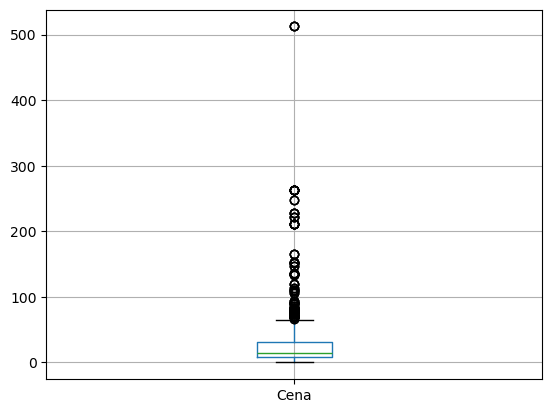

In [57]:
# rysujemy boxplot dla ceny
df_all[['Cena']].boxplot()

<Axes: >

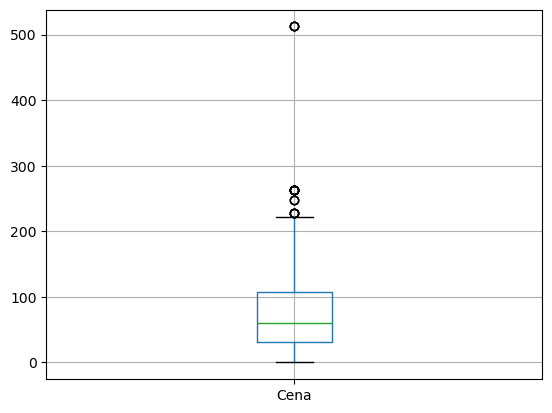

In [58]:
# wartości odstające w 1. klasie
# tworzymy zmienną przechowującą dane dla 1. klasy
outliers_first_class = df_all[df_all['Klasa'] == 1]

# tworzymy boxplot dla wartości cen tylko w 1. klasie
outliers_first_class[['Cena']].boxplot()

<Axes: >

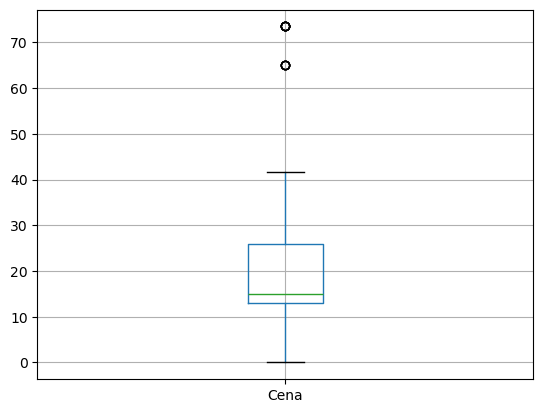

In [59]:
# wartości odstające w 2. klasie
# tworzymy zmienną przechowującą dane dla 2. klasy
outliers_second_class = df_all[df_all['Klasa'] == 2]

# tworzymy boxplot dla wartości cen tylko w 2. klasie
outliers_second_class[['Cena']].boxplot()

<Axes: >

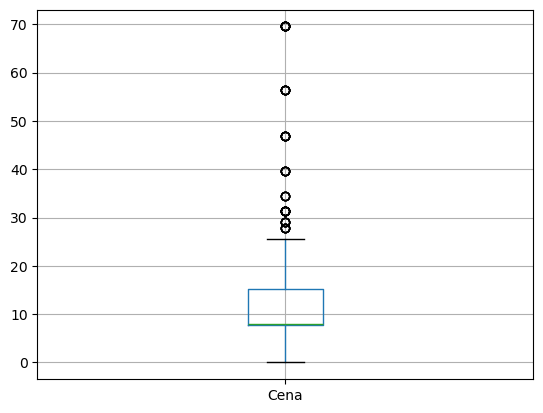

In [60]:
# wartości odstające w 3. klasie
# tworzymy zmienną przechowującą dane dla 3. klasy
outliers_third_class = df_all[df_all['Klasa'] == 3]

# tworzymy boxplot dla wartości cen tylko w 3. klasie
outliers_third_class[['Cena']].boxplot()

#### Wnioski
- Ceny biletów są bardzo rozproszone.
- W każdej klasie występują wartości odstające, ale najwięcej jest ich dla cen w klasie 3.

### 6.2. Wiek

<Axes: >

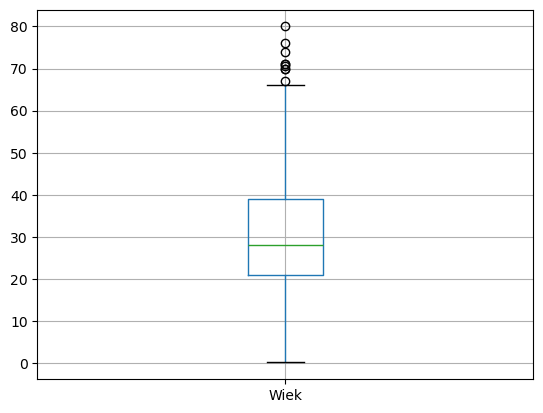

In [61]:
# rysujemy boxplot dla wieku
df_all[['Wiek']].boxplot()

#### Wnioski:
- Wiek pasażerów jest bardzo rozproszony co nie powinno dziwić, ponieważ podróżowali zarówno rodzice z niemowlakami, jak i emeryci.

### 6.3. Liczebność rodzin

<Axes: >

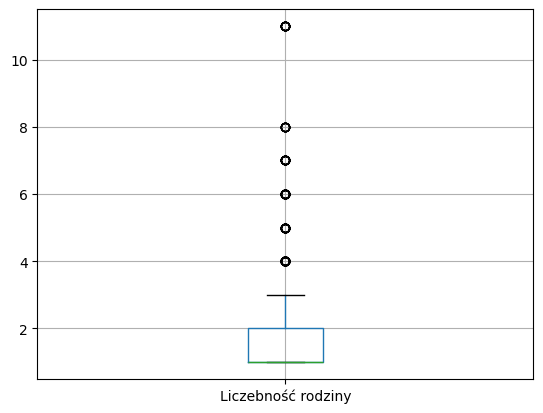

In [62]:
# rysujemy boxplot dla liczebności rodzin
df_all[['Liczebność rodziny']].boxplot()

#### Wnioski:
- Boxplot liczebności poszczególnych rodzin pokazuje kilka wartości odstających, co jest zrozumiałe, ponieważ większość stanowiły rodziny 2- lub 3-osobowe, ale zdarzały się również nawet 11-osobowe. 

## 7. Podsumowanie i wnioski ostateczne
- Pasażerowie podróżujący w klasie 1. płacili najwięcej za bilety, ale to właśnie w tej klasie najwięcej osób przeżyło.
- Ceny biletów są bardzo rozproszone - najwięcej pasażerów było w klasie 3. i płacili relatywnie niską cenę, ale byli też tacy, którzy podróżowali w totalnym luksusie (cena 512), co może świadczyć o tym, że należeli do elity.
- Pomimo że zmarłych było aż ok. 62%, przeżyło aż 73% kobiet, co obrazuje gigantyczne poświęcenie mężczyzn w czasie katastrofy.
- Warunki musiały być bardzo trudne, ponieważ znaleziono zaledwie 121 ciał spośród 809 ofiar.

In [64]:
!jupyter nbconvert titanic.ipynb --to html --no-input --no-prompt --output titanic.html

[NbConvertApp] Converting notebook titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 34 image(s).
[NbConvertApp] Writing 1214213 bytes to titanic.html
